In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pickle as pk

from pathlib import Path

from palettable.cartocolors.qualitative import Safe_6


In [2]:
home = str(Path.home())
with open(home+'/dev/minorplanets/sn_sorted.pk', 'rb') as f:
    df = pk.load(f)

In [3]:
names = []
periods = np.zeros(40)
idxs = np.zeros(40)
sns = np.zeros(40)
shapes = np.zeros((40,2))
poles = np.zeros(40)

for i in range(40):
    names.append(df[i]['name'])
    periods[i] = df[i]['period']
    idxs[i] = df[i]['idx']
    sns[i] = df[i]['sn']
    shapes[i,...] = df[i]['shape']
    poles[i] = df[i]['pole']
    
names = np.array(names)

In [4]:
shapes = np.amax(shapes, axis = 1)

In [5]:
shapes[37]

1.0

/tmp/ipykernel_40297/1629594500.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top = cm.get_cmap('Blues_r', 128)
/tmp/ipykernel_40297/1629594500.py:7: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  cm.register_cmap('model', cmap = ListedColormap(newcolors))


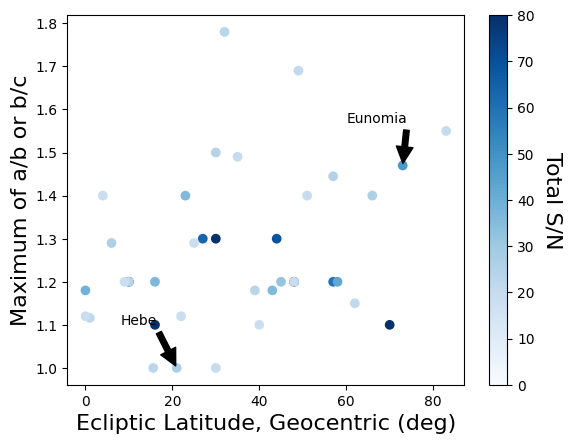

In [6]:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'

flags = np.where((names=='Hebe') | (names == 'Eunomia'))[0]
skip_flags = np.ones(40, dtype=bool)
skip_flags[37] = False
skip_flags[39] = False


plt.scatter(abs(poles[skip_flags]), shapes[skip_flags], c = sns[skip_flags], zorder = 3, vmin = 0, vmax = 80, cmap=cmap)

cbar = plt.colorbar()
cbar.set_label('Total S/N', rotation=270, labelpad = 20, size = 16)
#plt.scatter(abs(poles)[flags], shapes[flags], marker='o', color='black', linewidths=6, zorder=2, cmap=cmap)
plt.ylabel('Maximum of a/b or b/c', size=16)
plt.xlabel('Ecliptic Latitude, Geocentric (deg)', size=16)
for i in range(40):
    if i in flags:
        plt.annotate(names[i], (poles[i], shapes[i]),(poles[i]-13, shapes[i]+0.1), 
                     arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('./plots/poles_shape_scatter.pdf', dpi=300)
plt.savefig('./plots/poles_shape_scatter.png', dpi=300)

In [23]:
names[39]

'Ursula'

In [58]:
sns

array([173.20508076, 166.52105777, 154.43594622,  87.56523874,
        80.2087453 ,  69.25222355,  63.26477598,  55.19217298,
        47.44191804,  41.287993  ,  37.38792002,  36.13448075,
        35.9968181 ,  35.44886902,  26.56870611,  26.0197899 ,
        25.77493266,  25.01523771,  23.43851579,  23.26576204,
        23.12763733,  22.71286322,  22.40196217,  21.48290855,
        20.02559551,  19.89983024,  19.51958767,  19.50268826,
        19.31158983,  19.05209047,  19.02048119,  18.66752603,
        18.40441191,  18.36726295,  18.19266524,  18.14812907,
        17.94966285,  17.71963655,  17.54757014,  17.43957075])

In [62]:
names

array(['Pallas', 'Vesta', 'Ceres', 'Iris', 'Hygiea', 'Davida', 'Juno',
       'Europa', 'Eunomia', 'Fortuna', 'Interamnia', 'Flora', 'Metis',
       'Amphitrite', 'Hebe', 'Patientia', 'Julia', 'Sylvia', 'Doris',
       'Eugenia', 'Prokne', 'Winchester', 'Herculina', 'Eukrate', 'Nuwa',
       'Nemausa', 'Cybele', 'Laetitia', 'Elektra', 'Camilla', 'Eunike',
       'Thisbe', 'Minerva', 'Ino', 'Siegena', 'Egeria', 'Euphrosyne',
       'Peraga', 'Psyche', 'Ursula'], dtype='<U10')